<a href="https://colab.research.google.com/github/Son0208/prac_class/blob/main/w3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

In [ ]:
install.packages("nycflights13")

In [4]:
library(nycflights13)

In [5]:
?flights

In [ ]:
head(flights)

filter

In [ ]:
filter(flights, month == 1, day == 1) %>% head()

In [ ]:
filter(flights, month == 1, day == 1 & distance > 1000) %>% head()

In [ ]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head()

arrange

In [30]:
arrange(flights, distance) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,27,NA,106,NA,NA,245,NA,US,1632,NA,EWR,LGA,NA,17,1,6,2013-07-27 01:00:00
2013,1,3,2127,2129,-2,2222,2224,-2,EV,3833,N13989,EWR,PHL,30,80,21,29,2013-01-03 21:00:00
2013,1,4,1240,1200,40,1333,1306,27,EV,4193,N14972,EWR,PHL,30,80,12,0,2013-01-04 12:00:00
2013,1,4,1829,1615,134,1937,1721,136,EV,4502,N15983,EWR,PHL,28,80,16,15,2013-01-04 16:00:00
2013,1,4,2128,2129,-1,2218,2224,-6,EV,4645,N27962,EWR,PHL,32,80,21,29,2013-01-04 21:00:00
2013,1,5,1155,1200,-5,1241,1306,-25,EV,4193,N14902,EWR,PHL,29,80,12,0,2013-01-05 12:00:00


In [31]:
arrange(flights, year, month, distance) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,3,2127,2129,-2,2222,2224,-2,EV,3833,N13989,EWR,PHL,30,80,21,29,2013-01-03 21:00:00
2013,1,4,1240,1200,40,1333,1306,27,EV,4193,N14972,EWR,PHL,30,80,12,0,2013-01-04 12:00:00
2013,1,4,1829,1615,134,1937,1721,136,EV,4502,N15983,EWR,PHL,28,80,16,15,2013-01-04 16:00:00
2013,1,4,2128,2129,-1,2218,2224,-6,EV,4645,N27962,EWR,PHL,32,80,21,29,2013-01-04 21:00:00
2013,1,5,1155,1200,-5,1241,1306,-25,EV,4193,N14902,EWR,PHL,29,80,12,0,2013-01-05 12:00:00
2013,1,6,2125,2129,-4,2224,2224,0,EV,4619,N22909,EWR,PHL,22,80,21,29,2013-01-06 21:00:00


In [32]:
arrange(flights, desc(distance)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


select

In [ ]:
select(flights, year, month, day) %>% head()

In [ ]:
select(flights, year:day) %>% head()

In [ ]:
select(flights, -(year:day)) %>% head()

In [ ]:
select(flights, starts_with("arr")) %>% head()

In [ ]:
select(flights, contains("arr")) %>% head()

In [ ]:
select(flights, time_hour, air_time, everything()) %>% head()

mutate

In [ ]:
flights %>% select(year:day, ends_with("delay"), distance, air_time) %>% head() 

In [ ]:
flights %>% 
    select(year:day, ends_with("delay"), distance, air_time) %>% 
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

group by , summarise

In [ ]:
flights %>% group_by(year, month, day) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) %>% head()

In [42]:
flights %>% group_by(origin) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE)) %>% head()

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


In [61]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()


dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


In [ ]:
flights %>% group_by(month) %>% summarise(count = n(), dist = mean(distance, na.rm = TRUE)) 

ggplot

distance change in month

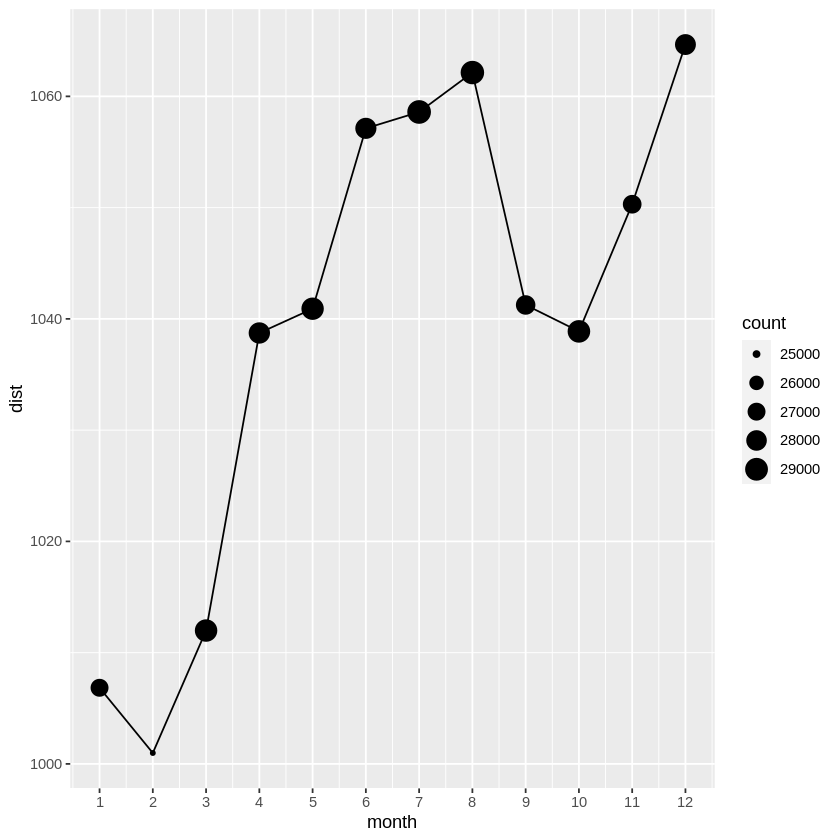

In [117]:
flights %>% group_by(month) %>% summarise(count = n(), dist = mean(distance, na.rm = TRUE)) %>% 
ggplot(mapping = aes(x = month, y = dist)) +
scale_x_continuous(breaks = c(1,2,3,4,5,6,7,8,9,10,11,12)) + 
geom_point(aes(size = count)) +
geom_line()